In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# dimensions of our images.

img_width, img_height = 224, 224
IMAGE_SIZE= [224, 224]
train_data_dir = "/content/drive/MyDrive/Main Project/dataset/Train"
validation_data_dir = "/content/drive/MyDrive/Main Project/dataset/Validation"
image_files = glob(train_data_dir + '/*/*.jp*g')
valid_image_files = glob(validation_data_dir + '/*/*.jp*g')

epochs = 50
batch_size = 32



In [ ]:
 # useful for getting number of classes
folders = glob("/content/drive/MyDrive/Main Project/dataset/Train/*")

In [ ]:
# build the VGG16 network
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False
print('Model loaded.')

Model loaded.


In [ ]:

x = Flatten()(vgg.output)

prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:

# create generators
train_generator = gen.flow_from_directory(
  train_data_dir,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  validation_data_dir,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

# fit the model
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)

Found 814 images belonging to 2 classes.
Found 136 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
25/25 [==============================] - 20s 500ms/step - loss: 1.2642 - accuracy: 0.7823 - val_loss: 0.1821 - val_accuracy: 0.9688
Epoch 2/50
25/25 [==============================] - 12s 495ms/step - loss: 0.4063 - accuracy: 0.9387 - val_loss: 0.4315 - val_accuracy: 0.9609
Epoch 3/50
25/25 [==============================] - 12s 481ms/step - loss: 0.2213 - accuracy: 0.9606 - val_loss: 0.2168 - val_accuracy: 0.9688
Epoch 4/50
25/25 [==============================] - 12s 485ms/step - loss: 0.2342 - accuracy: 0.9608 - val_loss: 0.1017 - val_accuracy: 0.9844
Epoch 5/50
25/25 [==============================] - 12s 481ms/step - loss: 0.1342 - accuracy: 0.9846 - val_loss: 0.1724 - val_accuracy: 0.9766
Epoch 6/50
25/25 [==============================] - 12s 482ms/step - loss: 0.2243 - accuracy: 0.9758 - val_loss: 0.1833 - val_accuracy: 0.9844
Epoch 7/50
25/25 [==============================] - 12s 480ms/step - loss: 0.1592 - accuracy: 0.9825 - val_loss: 0.1357 - val_accuracy: 0.9844

In [ ]:


model.save_weights('vgg_try.h5')
import tensorflow as tf

from keras.models import load_model

model.save('vgg_model.h5')

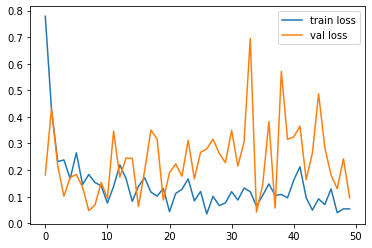

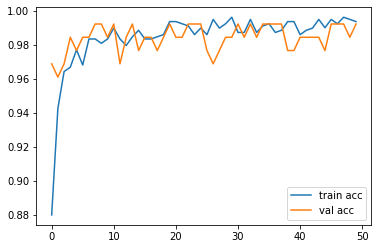

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Loss_plot')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Accuracy_plot')

Not Yawning


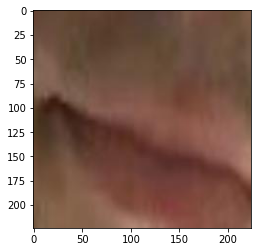

In [ ]:
from keras.preprocessing import image

test_image = image.load_img("/content/drive/MyDrive/Main Project/dataset/Validation/No_yawn/no_yawn40.jpg", target_size = (224, 224)) 
imz=test_image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = model.predict(test_image)
if result[0][0]==1:
    prediction="Not Yawning"
else:
    prediction="Yawning"


plt.imshow(imz)
print(prediction)